# Part A (30 marks)

## Solve the following tasks:

### Write a function in python that determines the distance a car travels in meters given engine force as input 
### assume the following:

#### The force is constant.

#### The mass of the car is 1750kg.

#### The car starts from rest.

#### Friction, drag, and other forces are ignored

### To make it more realistic, add friction and air resistance to the function using the following principles: 
#### Net force = Engine force − Rolling friction − Air drag

#### Rolling friction = umg


#### Air drag = 1/2 * Cd * A * p * v^2


#### Where:

#### u = rolling resistance coefficient (0.02)

#### g = gravity (9.81 m/s²)

#### p = air density (≈ 1.225 kg/m³)

#### Cd = drag coefficient (0.3)

#### A= frontal area of the car (2.3 m²)

#### v = car speed

1. Show how the car's velocity and distance evolve over time under the influence of engine force, friction, and air resistance with two line charts.
1. Determine the most powerful car from the dataset of Assessment 2 and determine the maximum speed using the function created in Task 2 (constants remain unchanged).
1. Plot the car's velocity over time until it reaches maximum velocity in a line chart.
1. Write a function that determines the stopping distance for a car given the current speed and break force
1. In a drag race where the car is accelerating to maximum speed (Task 4) and then brought to a safe stop using a break force of 1kN, what is the minimum length of track required?

In [1]:
def distance_travelled(engine_force, time):
    # Using F = m/a (Newton's second law, knowing that m = 1750kg
    acceleration = engine_force/1750

    # Using s = ut + 1/2at^2, knowing that u = 0
    return (1/2) * acceleration * time **2
    

In [2]:
def distance_travelled_over_time(engine_force, time):
    # Initial Conditions
    velocity = 0 
    distance = 0
    delta_time = 0.01
    

    for t in range(int(time/delta_time)):
        # Known formulas of forces
        rolling_friction = 0.02 * 1750 * 9.81
        air_drag = (1/2) * 0.3 * 2.3 * 1.225 * velocity**2

        # Calculate force and acceleration at time increment
        net_force = engine_force - (rolling_friction + air_drag)
        acceleration = net_force/1750

        # Update velocity and distance
        velocity += acceleration * delta_time
        distance += velocity * delta_time

        # Break from loop when car stops, at velocity <= 0
        if velocity <= 0:
            break

    # Convert value to kilometres as this is the conventional distance measurement in cars
    return distance/1000
 
        


In [3]:
def velocity_over_time(engine_force, time):
    # Initial Conditions
    velocity = 0 
    distance = 0
    delta_time = 0.01
    

    for t in range(int(time/delta_time)):
        # Known formulas of forces
        rolling_friction = 0.02 * 1750 * 9.81
        air_drag = (1/2) * 0.3 * 2.3 * 1.225 * velocity**2

        # Calculate force and acceleration at time increment
        net_force = engine_force - (rolling_friction + air_drag)
        acceleration = net_force/1750

        # Update velocity
        velocity += acceleration * delta_time

    # Convert velocity to km/h as this is the conventional units for cars
    return velocity * (3600/1000)


# Show how the car's velocity and distance evolve over time under the influence of engine force, friction, and air resistance with two line charts.

In [4]:
# Demonstrating relationship between both distance and velocity over time with a constant engine force
# The average torque of a car is around 500Nm and the radius of the wheel around 25 cm (0.25m)
# Using the formula Engine force = torque(in Nm)/radius of wheel:

average_engine_force = 500/0.25

<Axes: title={'center': 'Time vs Distance in an average car'}, xlabel='Time (s)', ylabel='Distance (km)'>

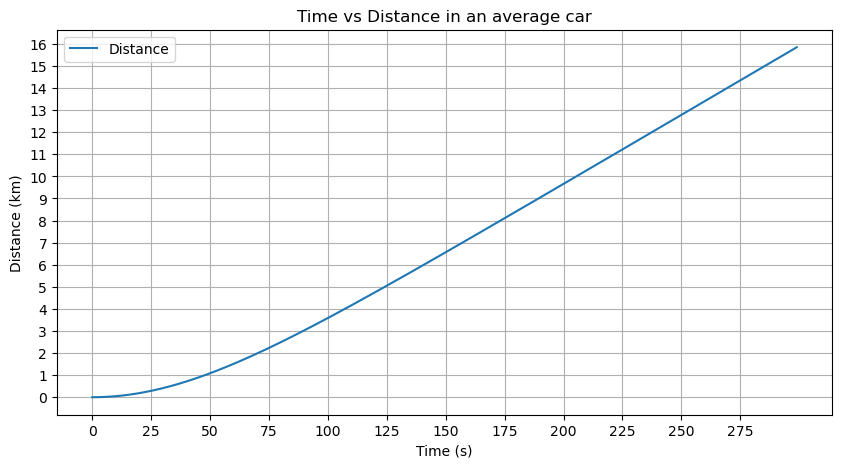

In [5]:
import pandas

# Initial conditions
velocity = []
distance = []
time_intervals = []

# iterating through time intervals to recieved distance and velocity values:
for t in range(0,300,1):
    time_intervals.append(t)
    distance.append(distance_travelled_over_time(average_engine_force, t))
    velocity.append(velocity_over_time(average_engine_force, t))


# Creating pandas dataframe
data = list(zip(time_intervals, distance, velocity))
df = pandas.DataFrame(data, columns=['Time', 'Distance', 'Velocity'])    
average_car_df = df.set_index('Time')

# Plotting distance vs time
average_car_df.plot.line(y = 'Distance', xlabel = 'Time (s)', ylabel = 'Distance (km)', yticks=range(0,17,1), xticks=range(0,300,25), title = 'Time vs Distance in an average car', figsize = (10,5), grid = True)

<Axes: title={'center': 'Time vs Velocity in an average car'}, xlabel='Time (s)', ylabel='Velocity (km/h)'>

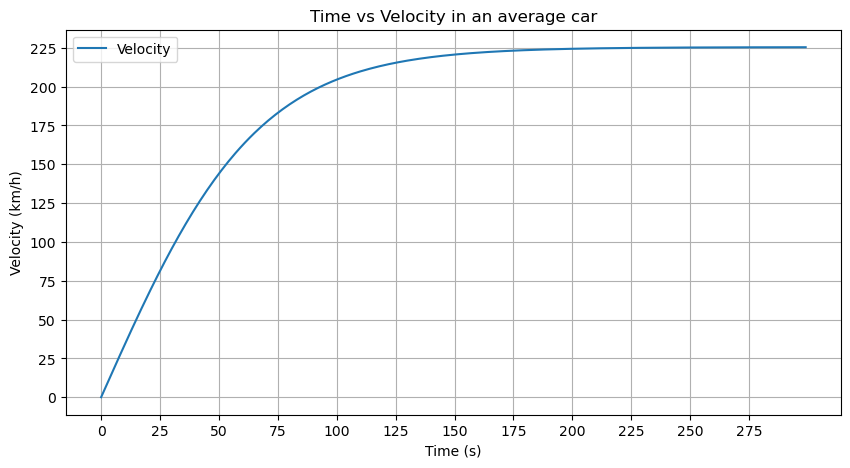

In [6]:
# Plotting velocity column in dataframe
average_car_df.plot.line(y = 'Velocity', xlabel = 'Time (s)', ylabel = 'Velocity (km/h)', yticks=range(0,250,25), xticks=range(0,300,25), title = 'Time vs Velocity in an average car', figsize = (10,5), grid = True)

In [7]:
# As can be seen from the graph above the velocity reaches a point of saturation where the gradient continues at 0. At this point it reveals the maximum speed
# Which looks to be around 214km/h

# Determine the most powerful car from the dataset of Assessment 2 and determine the maximum speed using the function created in Task 2 (constants remain unchanged).

In [8]:
car_data = pandas.read_csv('Final Assignment Two Data (1).csv')

In [9]:
car_data['Torque (lb-ft)'].max()

np.float64(1696.0)

In [10]:
# The next valuable piece of information is the specific car's wheel radius which needs to be found through research
car_data[car_data['Torque (lb-ft)'] == 1696]
# For this example we will look at the Nevera since it exhibits the larger hp of the two making it the faster overall car
# Through this it was found that the wheel radius is 25.4 cm (0.254 m)
nevera_wheel_radius = 0.254

# This value of 1696.0 is in lb-ft and so we need to convert it to Nm in order to apply the previous method.
# where one lb-ft is equal to 1.35582Nm
torque_in_Nm = 1696 * 1.35582

# Use engine force = torque/wheel radius in previous section with new values
powerful_car_engine_force = torque_in_Nm/nevera_wheel_radius

In [11]:
# reiterating through time intervals to recieve velocity values of the new engine force input until a maximum force is reached:
y = 0
# Using an arbitrary large interval of time to see whether the maximum speed lies within it
for t in range(0,1000,1):
    x = velocity_over_time(powerful_car_engine_force, t)
    if x > y:
        y = x
    elif x<= y and x!=0:
        break
print(x)
print(t)

516.8042974584502
436


In [12]:
# Therefore top speed is roughly 516.8 km/h which is reached at time 436 seconds

# Plot the car's velocity over time until it reaches maximum velocity in a line chart.

<Axes: title={'center': 'Time vs Velocity in a powerful car'}, xlabel='Time (s)', ylabel='Velocity (km/h)'>

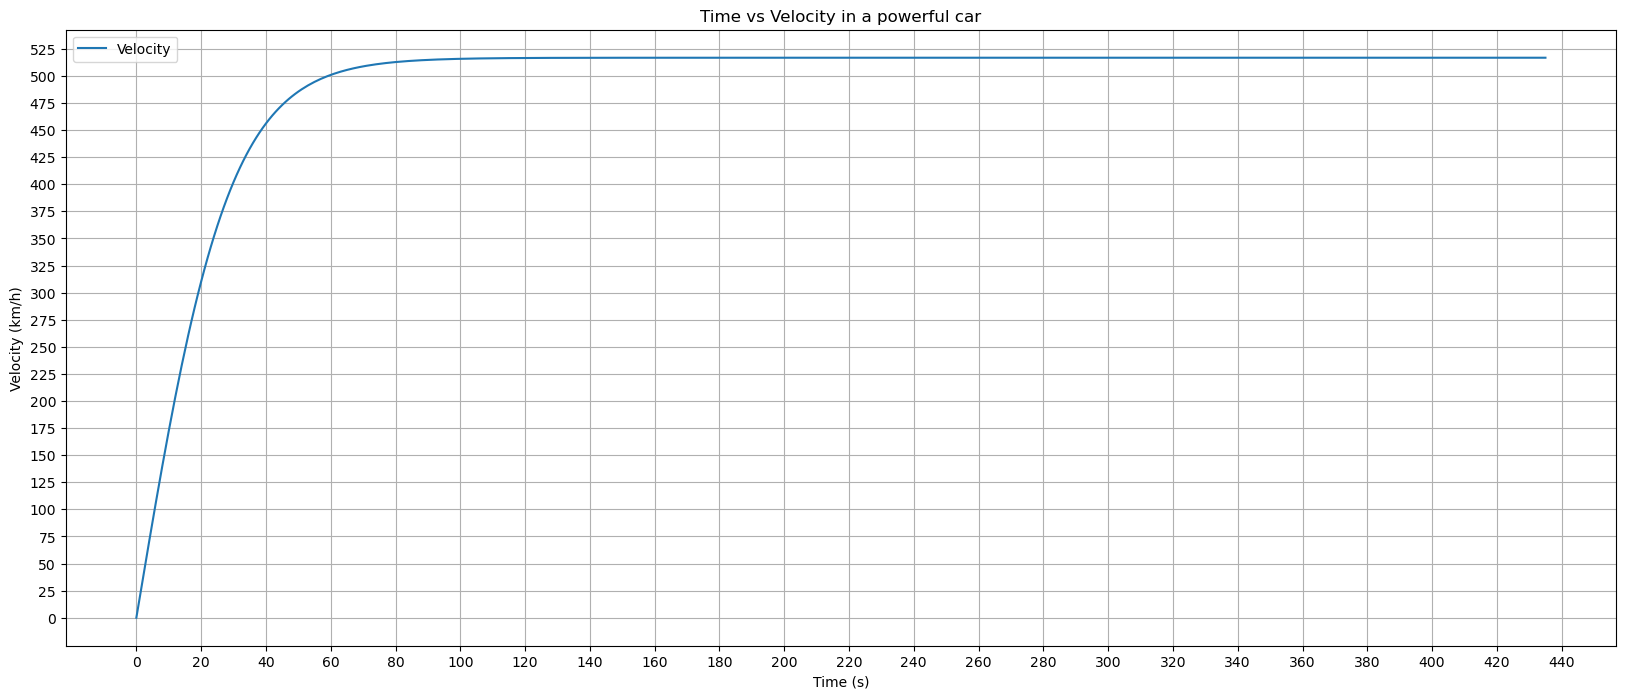

In [13]:
# Resetting to initial conditions: 
velocity = []
time_intervals_to_velocity = []

# Iterating through velocity until time 436 seconds as this is when maximum velocity is reached as displayed above
for t in range(0,436,1):  
    velocity.append(velocity_over_time(powerful_car_engine_force, t))
    time_intervals_to_velocity.append(t)

# Creating pandas data frame from lists
data = list(zip(time_intervals_to_velocity, velocity))
df = pandas.DataFrame(data, columns=['Time', 'Velocity'])
powerful_car_df = df.set_index('Time')

# Plotting dataframe
powerful_car_df.plot.line(xlabel = 'Time (s)', ylabel = 'Velocity (km/h)', yticks=range(0,550,25), xticks=range(0,460,20), title = 'Time vs Velocity in a powerful car', figsize = (20,8), grid = True)

# Write a function that determines the stopping distance for a car given the current speed and break force

In [14]:
def stopping_distance(initial_speed, break_force):
    # knowing that mass equals 1750 and the a equal F/m
    acceleration = break_force/1750

    # find time at which car stops using v = u + at, where v is 0 and rearranging for t
    time_to_stop = initial_speed/acceleration

    # return displacement using s = ut + 1/2*a*t^2
    return initial_speed * time_to_stop + (1/2) * acceleration * time_to_stop **2

# In a drag race where the car is accelerating to maximum speed (Task 4) and then brought to a safe stop using a break force of 1kN, what is the minimum length of track required?

In [15]:
# The maximum speed was determine to be 516.8042974584502km/h, this value will be the initial speed, Ux, while break force will be 1000N, Fb.
# It will be assumed that the required length of the track should be equal to or greater than the stopping_distance
minimum_track_length_in_metres = stopping_distance(516.8042974584502, 1000)
minimum_track_length_in_metres


701102.5399127458

In [17]:
# The track length should be a minimum of 701102.5399127458 metres or approximately 701103 metres
# In kilometres this length is:
minimum_track_length_in_kilometres = minimum_track_length_in_metres/1000
minimum_track_length_in_kilometres

701.1025399127458

In [ ]:
# 701.103km